<a href="https://colab.research.google.com/github/ElizavetaNosova/HSE_ML_homework/blob/master/ClusteringHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample.csv


In [0]:
import pandas as pd
import sklearn

In [0]:
data = pd.read_csv('sample.csv')
sample = data[['category_name', 'title']]
pd.set_option('display.max_rows', 500)

In [0]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN, \
                            KMeans, MiniBatchKMeans, Birch, MeanShift, SpectralClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, \
                            silhouette_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.datasets import make_blobs

In [0]:
cv1 = CountVectorizer()
cv2 = CountVectorizer(ngram_range = (1,2))
cv3 = CountVectorizer(max_df=2)
cv4 = CountVectorizer(analyzer='char', ngram_range = (2,3))

In [0]:
y = sample['category_name']

In [0]:
def test_vectorizer(cv, claster):
  X = cv.fit_transform(sample['title'])
  claster.fit(X)
  labels = claster.labels_
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))
    

In [0]:
AP1 = AffinityPropagation(max_iter=500)
AP2 =  AffinityPropagation(damping = 0.9, max_iter=500)

In [9]:
test_vectorizer(cv1, AP1)

Homogeneity: 0.429
Completeness: 0.416
V-measure: 0.423
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.275


In [10]:
test_vectorizer(cv1, AP2)

Homogeneity: 0.403
Completeness: 0.417
V-measure: 0.410
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.270


In [11]:
test_vectorizer(cv2, AP1)

Homogeneity: 0.382
Completeness: 0.405
V-measure: 0.393
Adjusted Rand Index: -0.032
Adjusted Mutual Information: 0.226


In [12]:
test_vectorizer(cv2, AP2)

Homogeneity: 0.381
Completeness: 0.406
V-measure: 0.393
Adjusted Rand Index: -0.032
Adjusted Mutual Information: 0.226


In [13]:
test_vectorizer(cv3, AP1)

Homogeneity: 0.381
Completeness: 0.428
V-measure: 0.403
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.110


In [14]:
test_vectorizer(cv3, AP2)

Homogeneity: 0.850
Completeness: 0.360
V-measure: 0.506
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.001


In [15]:
test_vectorizer(cv4, AP1)

Homogeneity: 0.525
Completeness: 0.371
V-measure: 0.435
Adjusted Rand Index: 0.017
Adjusted Mutual Information: 0.272


In [16]:
test_vectorizer(cv4, AP2)

Homogeneity: 0.522
Completeness: 0.369
V-measure: 0.433
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.270


Кажется, что довольно хороший результат даёт пара cv3, AP2. Посмотрим группы

In [0]:
cv = cv3
claster = AP2
X = cv.fit_transform(sample['title'])
claster.fit(X)
sample['claster'] = claster.labels_

In [19]:
sample[sample.claster==7].head(10)

,category_name,title,claster
8,Квартиры,"2-к квартира, 45 м², 4/5 эт.",7
208,Квартиры,"4-к квартира, 115.7 м², 1/5 эт.",7
371,Телефоны,Чехлы на samsung galaxy s3,7
2002,Предложение услуг,Ремонт и строительство домов и квартир,7


Нет, это ужасная группа: вперемешку чехлы и квартиры

In [22]:
sample[sample.claster==45].head(10)

,category_name,title,claster
55,Ремонт и строительство,Труба гофрированая двуслойная,45


Кажется, модель переобучилась и разделила на слишком мелкие группы. Попробуем другую пару

In [0]:
cv = cv4
claster = AP1
X = cv.fit_transform(sample['title'])
claster.fit(X)
sample['claster'] = claster.labels_

In [24]:
sample[sample.claster==7].head(10)

,category_name,title,claster
50,Детская одежда и обувь,Сапожки,7
233,Детская одежда и обувь,Бассаножки на скале,7
608,"Одежда, обувь, аксессуары",Сапоги зимние,7
672,Детская одежда и обувь,Натуральные сапожки зима,7
673,"Одежда, обувь, аксессуары",Сапожки volatile Stevie,7
817,Детская одежда и обувь,Сапожки весна\осень,7
892,"Одежда, обувь, аксессуары",Супер сапожки,7
1226,Детская одежда и обувь,Полусапожки весна-осень,7
1375,Детская одежда и обувь,Зимние сапожки Капика,7
1653,"Одежда, обувь, аксессуары",Стильные полусапожки,7


In [25]:
sample[sample.claster==10].head(10)

,category_name,title,claster
18,Мебель и интерьер,Диван и 2 кресла,10
61,Мебель и интерьер,Диван,10
241,Бытовая техника,Мультиварка,10
283,Предложение услуг,Техническое обслуживание кондиционеров,10
294,"Одежда, обувь, аксессуары",Белые брючки Страдивариус,10
328,Предложение услуг,Наращивание ресниц,10
397,Мебель и интерьер,Продается диван,10
419,Автомобили,"LADA 4x4 (Нива), 2006",10
723,Мебель и интерьер,Полка для ванной,10
943,Бытовая техника,Мультиварка delta DL6502,10


Лучше, но в 10-ю группу попали не связанные друг с другом вещи.
Попробуем tfidf. Предполагаю, что "Страдивариус" из-за n-gram стали ассоциироваться с "варить"

In [0]:
tfidf1 = TfidfVectorizer()
tfidf2 = TfidfVectorizer(ngram_range = (1,2))
tfidf3 = TfidfVectorizer(max_df=2)
tfidf4 = TfidfVectorizer(analyzer='char', ngram_range = (2,3))

In [28]:
test_vectorizer(tfidf1, AP2)

Homogeneity: 0.293
Completeness: 0.401
V-measure: 0.339
Adjusted Rand Index: -0.033
Adjusted Mutual Information: 0.208


In [29]:
test_vectorizer(tfidf2, AP1)

Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [30]:
test_vectorizer(tfidf2, AP2)

Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


In [32]:
test_vectorizer(tfidf3, AP2)

Homogeneity: 1.000
Completeness: 0.396
V-measure: 0.567
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.001


In [33]:
test_vectorizer(tfidf4, AP1)

Homogeneity: 0.740
Completeness: 0.407
V-measure: 0.525
Adjusted Rand Index: 0.043
Adjusted Mutual Information: 0.323


In [34]:
test_vectorizer(tfidf1, AP2)

Homogeneity: 0.293
Completeness: 0.401
V-measure: 0.339
Adjusted Rand Index: -0.033
Adjusted Mutual Information: 0.208


C tfidf в опробованных настройках что-то приемлемое получилось только на n-грамах

In [0]:
cv = tfidf4
claster = AP1
X = cv.fit_transform(sample['title'])
claster.fit(X)
sample['claster'] = claster.labels_

In [36]:
sample[sample.claster==10].head(10)

,category_name,title,claster
72,Земельные участки,"Участок 10 сот. (СНТ, ДНП)",10
293,Земельные участки,"Участок 8 сот. (СНТ, ДНП)",10
738,Земельные участки,"Участок 4 сот. (СНТ, ДНП)",10
753,Земельные участки,"Участок 6 сот. (СНТ, ДНП)",10
1102,Земельные участки,"Участок 8 сот. (СНТ, ДНП)",10
1742,Земельные участки,"Участок 6 сот. (СНТ, ДНП)",10
1970,Земельные участки,"Участок 6 сот. (СНТ, ДНП)",10
1986,Земельные участки,"Участок 13 сот. (СНТ, ДНП)",10
1999,Земельные участки,"Участок 20 сот. (СНТ, ДНП)",10
2063,Земельные участки,"Участок 10 сот. (СНТ, ДНП)",10


In [37]:
sample[sample.claster==7].head(10)

,category_name,title,claster
50,Детская одежда и обувь,Сапожки,7
672,Детская одежда и обувь,Натуральные сапожки зима,7
673,"Одежда, обувь, аксессуары",Сапожки volatile Stevie,7
817,Детская одежда и обувь,Сапожки весна\осень,7
892,"Одежда, обувь, аксессуары",Супер сапожки,7
1375,Детская одежда и обувь,Зимние сапожки Капика,7
1653,"Одежда, обувь, аксессуары",Стильные полусапожки,7
2323,Детская одежда и обувь,Детские осенние сапожки б/у с подсветкой,7


In [38]:
sample[sample.claster==15].head(10)

,category_name,title,claster
129,Товары для детей и игрушки,Колыбель simplicity,15
427,Товары для детей и игрушки,Колыбель,15
986,"Одежда, обувь, аксессуары","Угги Incity, не стоптаны",15
1157,Велосипеды,Покрышки Schwalbe city jet (26 радиус),15


Из проверенных две группы хорошие, одна так себе. Кажется, векторайзер слишком сильно реагирует на латинские буквы. Попробуем от них избавиться

In [0]:
import re
def remove_english(text):
    new_text = re.sub('[A-Za-z]+', '', text)
    new_text = re.sub('[ ]+', ' ', new_text)
    return new_text

In [0]:
sample_no_english = sample
sample_no_english['title'] = sample_no_english['title'].apply(remove_english) 

In [0]:
cv = tfidf4
claster = AffinityPropagation(max_iter=1000, damping=0.9)
X = cv.fit_transform(sample_no_english['title'])
claster.fit(X)
sample_no_english['claster'] = claster.labels_

In [47]:
sample[sample.claster==15].head(10)

,category_name,title,claster
248,Бытовая техника,Стиральная машинка 5,15
541,Бытовая техника,"Стиральная машинка ""Малютка""",15
1720,Бытовая техника,Стиральная машинка Сибирь,15
1981,Бытовая техника,Стиральная машина Веко,15
2442,Бытовая техника,Узкая стиральная машина автомат,15
2447,Бытовая техника,Стиральная машинка Ассоль,15


In [48]:
sample[sample.claster==10].head(10)

,category_name,title,claster
207,Телефоны,Телефон,10
403,Телефоны,Продаётся телефон,10
451,Телефоны,Телефон,10
776,Телефоны,Телефон 3,10
1335,Телефоны,Сотовый телефон 5,10
1615,Телефоны,Телефон,10
1871,Товары для детей и игрушки,Телефон,10
2069,Телефоны,Телефон,10
2132,Телефоны,Телефоны,10
2416,Телефоны,Продам телефон,10


In [49]:
sample[sample.claster==5].head(10)

,category_name,title,claster
158,Товары для детей и игрушки,Коляска,5
408,Товары для детей и игрушки,Коляска,5
509,Товары для детей и игрушки,Коляска,5
785,Красота и здоровье,Коляска инвалидная,5
1005,Товары для детей и игрушки,Коляска 2 в 1,5
1092,Товары для детей и игрушки,Коляска,5
1233,Товары для детей и игрушки,Коляска 2в1,5
1303,Товары для детей и игрушки,Коляска,5
1364,Товары для детей и игрушки,Коляска капелла,5
1727,Товары для детей и игрушки,Санки-коляска,5


Либо результат работает хорошо, либо я не наткнулась на кластер, который выделен плохо.

In [0]:
KMeans1 = KMeans(n_clusters=50)
KMeans2 = KMeans(n_clusters=100)

In [0]:
svd = TruncatedSVD(50)
def test_vectorizer(cv, claster):
  X = cv.fit_transform(sample['title'])
  X_svd = svd.fit_transform(X)
  claster.fit(X_svd)
  labels = claster.labels_
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))

In [54]:
test_vectorizer(cv1, KMeans1)

Homogeneity: 0.303
Completeness: 0.387
V-measure: 0.340
Adjusted Rand Index: -0.014
Adjusted Mutual Information: 0.259


In [55]:
test_vectorizer(cv1, KMeans2)

Homogeneity: 0.335
Completeness: 0.372
V-measure: 0.352
Adjusted Rand Index: -0.016
Adjusted Mutual Information: 0.239


In [56]:
test_vectorizer(cv2, KMeans1)

Homogeneity: 0.288
Completeness: 0.382
V-measure: 0.328
Adjusted Rand Index: -0.011
Adjusted Mutual Information: 0.249


In [57]:
test_vectorizer(cv1, KMeans2)

Homogeneity: 0.334
Completeness: 0.371
V-measure: 0.352
Adjusted Rand Index: -0.020
Adjusted Mutual Information: 0.238


In [58]:
test_vectorizer(cv3, KMeans1)

Homogeneity: 0.033
Completeness: 0.449
V-measure: 0.061
Adjusted Rand Index: 0.006
Adjusted Mutual Information: 0.018


In [59]:
test_vectorizer(cv1, KMeans2)

Homogeneity: 0.334
Completeness: 0.370
V-measure: 0.351
Adjusted Rand Index: -0.014
Adjusted Mutual Information: 0.240


In [60]:
test_vectorizer(cv4, KMeans1)

Homogeneity: 0.381
Completeness: 0.355
V-measure: 0.368
Adjusted Rand Index: 0.072
Adjusted Mutual Information: 0.290


In [61]:
test_vectorizer(cv1, KMeans2)

Homogeneity: 0.334
Completeness: 0.369
V-measure: 0.351
Adjusted Rand Index: -0.018
Adjusted Mutual Information: 0.238


In [0]:
sample.drop(['claster'], axis=1)

Проверять модель на символьных n-грамах будем без английского текста

In [0]:
cv = cv4
cluster = KMeans1
X = cv.fit_transform(sample_no_english['title'])
X_svd = svd.fit_transform(X)
cluster.fit(X_svd)
sample_no_english['cluster'] = cluster.labels_

In [66]:
sample_no_english[sample_no_english.cluster==15].head(10)

,category_name,title,claster,cluster
22,Детская одежда и обувь,Платье,35,15
146,"Одежда, обувь, аксессуары",Платье,35,15
167,Детская одежда и обувь,Платье,35,15
249,"Одежда, обувь, аксессуары",Платье,35,15
251,"Одежда, обувь, аксессуары",Платье,35,15
287,"Одежда, обувь, аксессуары",Платье,35,15
516,"Одежда, обувь, аксессуары",Платье,35,15
529,"Одежда, обувь, аксессуары",Платье,35,15
592,Детская одежда и обувь,Платье,35,15
600,"Одежда, обувь, аксессуары",Платье,35,15


In [67]:
sample_no_english[sample_no_english.cluster==1].head(10)

,category_name,title,claster,cluster
31,Ноутбуки,5310,13,1
58,Автомобили,"- -класс, 1985",128,1
78,Ноутбуки,580 ( 5 3210 / 4 /500 / 635М),13,1
98,Телефоны,516,13,1
121,Квартиры,"Студия, 76 м², 5/11 эт.",13,1
286,Ноутбуки,655 12,13,1
306,Коллекционирование,Монета 1936 года,13,1
323,Гаражи и машиноместа,"Машиноместо, 14 м²",60,1
335,Водный транспорт,Стингрей320 Меркури 15,13,1
348,Грузовики и спецтехника,114,13,1


Это была плохая идея, так как техника превращается в числа. Возьмём данные с английским текстом

In [0]:
cv = cv4
cluster = KMeans1
X = cv.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
cluster.fit(X_svd)
sample['cluster'] = cluster.labels_

In [69]:
sample[sample.cluster==15].head(10)

,category_name,title,claster,cluster
22,Детская одежда и обувь,Платье,35,15
146,"Одежда, обувь, аксессуары",Платье,35,15
167,Детская одежда и обувь,Платье,35,15
249,"Одежда, обувь, аксессуары",Платье,35,15
251,"Одежда, обувь, аксессуары",Платье,35,15
287,"Одежда, обувь, аксессуары",Платье,35,15
516,"Одежда, обувь, аксессуары",Платье,35,15
529,"Одежда, обувь, аксессуары",Платье,35,15
592,Детская одежда и обувь,Платье,35,15
600,"Одежда, обувь, аксессуары",Платье,35,15


In [70]:
sample[sample.cluster==10].head(10)

,category_name,title,claster,cluster
1,Предложение услуг,Монолитные перекрытия. Своя опалубка,13,10
2,Детская одежда и обувь,Конверт на выписку,64,10
4,Красота и здоровье,Косметика,13,10
5,Ремонт и строительство,Новое Окно металлопластиковое трехстворчатое,13,10
12,Книги и журналы,"Грегори Киз ""Век безумия""",13,10
13,Мебель и интерьер,155 Новый диван книжка Велюр. От производителя,13,10
17,"Одежда, обувь, аксессуары",Топ на любой размер,13,10
18,Мебель и интерьер,Диван и 2 кресла,13,10
21,Часы и украшения,Часы наручные эксклюзив франция середина 20 века,13,10
24,Предложение услуг,Изготовление и монтаж ограждений из нержавеюще...,13,10


В 10 кластер попало всё подряд

In [71]:
test_vectorizer(tfidf1, KMeans1)

Homogeneity: 0.322
Completeness: 0.393
V-measure: 0.354
Adjusted Rand Index: -0.014
Adjusted Mutual Information: 0.273


In [72]:
test_vectorizer(tfidf1, KMeans2)

Homogeneity: 0.358
Completeness: 0.378
V-measure: 0.368
Adjusted Rand Index: -0.022
Adjusted Mutual Information: 0.252


In [73]:
test_vectorizer(tfidf2, KMeans1)

Homogeneity: 0.287
Completeness: 0.391
V-measure: 0.331
Adjusted Rand Index: -0.024
Adjusted Mutual Information: 0.250


In [74]:
test_vectorizer(tfidf2, KMeans2)

Homogeneity: 0.338
Completeness: 0.363
V-measure: 0.350
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.230


In [75]:
test_vectorizer(tfidf3, KMeans1)

Homogeneity: 0.042
Completeness: 0.271
V-measure: 0.072
Adjusted Rand Index: -0.001
Adjusted Mutual Information: 0.012


In [76]:
test_vectorizer(tfidf1, KMeans2)

Homogeneity: 0.350
Completeness: 0.372
V-measure: 0.361
Adjusted Rand Index: -0.025
Adjusted Mutual Information: 0.244


In [77]:
test_vectorizer(tfidf4, KMeans1)

Homogeneity: 0.392
Completeness: 0.356
V-measure: 0.373
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.295


In [78]:
test_vectorizer(tfidf4, KMeans2)

Homogeneity: 0.458
Completeness: 0.343
V-measure: 0.392
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.276


Выберем хорошую модель, где единица векторайзера - слова (символы посмотрела для cv)

In [0]:
cv = tfidf2
cluster = KMeans2
X = cv.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
cluster.fit(X_svd)
sample['cluster'] = cluster.labels_

In [80]:
sample[sample.cluster==10].head(10)

,category_name,title,claster,cluster
231,"Одежда, обувь, аксессуары",Босоножки,113,10
514,"Одежда, обувь, аксессуары",Босоножки,113,10
1071,"Одежда, обувь, аксессуары",Босоножки,113,10
1714,"Одежда, обувь, аксессуары",Босоножки,113,10
1819,"Одежда, обувь, аксессуары",Босоножки,113,10
2046,"Одежда, обувь, аксессуары",Босоножки,113,10
2098,"Одежда, обувь, аксессуары",Босоножки,113,10
2269,"Одежда, обувь, аксессуары",Босоножки,113,10


In [81]:
sample[sample.cluster==5].head(10)

,category_name,title,claster,cluster
16,"Одежда, обувь, аксессуары",Продам туфли,50,5
744,"Одежда, обувь, аксессуары",Продам туфли,50,5
765,"Одежда, обувь, аксессуары",Продам туфли,50,5


Биграмная модель не объединяет "продам туфли" и "туфли", если такие были

Возможно, стоило брать готовые векторы слов, обученные на текстах, потому что по заголовкам из одного-двух слов модель никак не может понять, что "босоножки" и "туфли" - это похожие вещи

Для tfidf- векторайзера и KMeans с количеством кластеров 50 попробуем другое матричное разложение (NMF). Будем оценивать только метрики, так как, чтобы сравнить модели кластеризации, а не просто оценить одну из них, нужно просмотреть все кластеры 

In [0]:
from sklearn.decomposition import NMF
nmf = NMF(50)

def test_NMF(vectorizer, cluster):
  X = vectorizer.fit_transform(sample['title'])
  X_nmf = nmf.fit_transform(X)
  claster.fit(X_nmf)
  labels = claster.labels_
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))

In [84]:
test_NMF(tfidf1, KMeans1)

Homogeneity: 0.362
Completeness: 0.359
V-measure: 0.360
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.219


In [85]:
test_NMF(tfidf2, KMeans1)

Homogeneity: 0.351
Completeness: 0.353
V-measure: 0.352
Adjusted Rand Index: -0.031
Adjusted Mutual Information: 0.215


In [86]:
test_NMF(tfidf3, KMeans1)

Homogeneity: 0.232
Completeness: 0.258
V-measure: 0.245
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.075


In [87]:
test_NMF(tfidf4, KMeans1)

Homogeneity: 0.472
Completeness: 0.334
V-measure: 0.391
Adjusted Rand Index: 0.051
Adjusted Mutual Information: 0.255


Homogenity во всех случаях лучше для NMF

Сравним разложения для модели MiniBatchKMeans и CountVectorizer

In [0]:
def test_SVD(vectorizer, cluster):
  X = cv.fit_transform(sample['title'])
  X_svd = svd.fit_transform(X)
  claster.fit(X_svd)
  labels = claster.labels_
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
  print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
  print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
  print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
  print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, labels))

In [0]:
cluster = MiniBatchKMeans(n_clusters=50, init_size=5000, verbose=1, max_iter=1000, 
                          max_no_improvement=100, reassignment_ratio=0.3)

In [90]:
test_SVD(cv1, cluster)

Homogeneity: 0.373
Completeness: 0.363
V-measure: 0.368
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.226


In [91]:
test_NMF(cv1, cluster)

Homogeneity: 0.341
Completeness: 0.370
V-measure: 0.355
Adjusted Rand Index: -0.015
Adjusted Mutual Information: 0.240


In [92]:
test_SVD(cv2, cluster)

Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [93]:
test_NMF(cv2, cluster)

Homogeneity: 0.335
Completeness: 0.365
V-measure: 0.349
Adjusted Rand Index: -0.015
Adjusted Mutual Information: 0.219


In [94]:
test_SVD(cv3, cluster)

Homogeneity: 0.366
Completeness: 0.366
V-measure: 0.366
Adjusted Rand Index: -0.030
Adjusted Mutual Information: 0.227


In [95]:
test_NMF(cv3, cluster)

Homogeneity: 0.332
Completeness: 0.384
V-measure: 0.356
Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.090


In [96]:
test_SVD(cv4, cluster)

Homogeneity: 0.369
Completeness: 0.362
V-measure: 0.365
Adjusted Rand Index: -0.031
Adjusted Mutual Information: 0.224


In [97]:
test_NMF(cv4, cluster)

Homogeneity: 0.484
Completeness: 0.337
V-measure: 0.397
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.257


При разных настройках векторайзера лучшие результаты показывают разные модели.
Были настройки (биграммы слов), при которых сошлась только модель с NMF

Посмотрим, какой "мусор" собирается алгоритмом MeanShift при разных настройках векторайзера.

In [0]:
cluster = MeanShift(cluster_all=False, bandwidth=0.5)
def testMeanShift(cv):
  cluster = MeanShift(cluster_all=False, bandwidth=0.5)
  X = cv.fit_transform(sample.title)
  X_svd = svd.fit_transform(X)
  cluster.fit(X_svd)
  sample['cluster'] = cluster.labels_

In [101]:
testMeanShift(cv1)
sample[sample.cluster==-1].head(50)

,category_name,title,claster,cluster
28,Телефоны,Телефон 36 арт.18498,13,-1
44,Квартиры,"2-к квартира, 44.1 м², 2/4 эт.",72,-1
47,Квартиры,"1-к квартира, 38 м², 3/12 эт.",23,-1
114,Квартиры,"2-к квартира, 50 м², 7/18 эт.",94,-1
134,Товары для детей и игрушки,Автокресло 15-36 кг,13,-1
153,Предложение услуг,Вдохновляем жизнь в ваш телефон заново,13,-1
174,Предложение услуг,Ведущая. Организация праздников под ключ,13,-1
263,"Дома, дачи, коттеджи",Дом 36 м² на участке 33 сот.,51,-1
286,Ноутбуки,655 12,13,-1
335,Водный транспорт,Стингрей320 Меркури 15,13,-1


Все объявления вполне обычные

In [102]:
testMeanShift(cv2)
sample[sample.cluster==-1].head(50)

,category_name,title,claster,cluster
18,Мебель и интерьер,Диван и 2 кресла,13,-1
21,Часы и украшения,Часы наручные эксклюзив франция середина 20 века,13,-1
61,Мебель и интерьер,Диван,80,-1
62,"Одежда, обувь, аксессуары",Футболка/майка,41,-1
83,Другие животные,Две большие черепашки им 11 лет,13,-1
92,Товары для детей и игрушки,Коляска трансформер плюс переноска сумка,83,-1
181,Детская одежда и обувь,Продается футболка,41,-1
335,Водный транспорт,Стингрей320 Меркури 15,13,-1
397,Мебель и интерьер,Продается диван,13,-1
404,Квартиры,"2-к квартира, 62 м², 1/2 эт.",88,-1


Попались обычные объявления и объявления, где в заголовке началось описание (прибыль продаваемой фирмы, "им столько-то лет" про домашних животных, "опыт 20 лет" при предложении услуг.

In [103]:
testMeanShift(cv3)
sample[sample.cluster==-1].head(50)

,category_name,title,claster,cluster
1,Предложение услуг,Монолитные перекрытия. Своя опалубка,13,-1
52,Товары для детей и игрушки,Сигма аро тим 2в1,13,-1
92,Товары для детей и игрушки,Коляска трансформер плюс переноска сумка,83,-1
165,Посуда и товары для кухни,Чайный сервиз (новый),13,-1
171,Детская одежда и обувь,Выписное одеяло-конверт на холодное время года,13,-1
297,Аудио и видео,Приемник 206 экспортное исполнение,13,-1
401,"Одежда, обувь, аксессуары",Украшения из георгиевских лент,13,-1
416,Спорт и отдых,Булавы для спорт.гимнастики,13,-1
443,Мебель и интерьер,"Консоль с зеркалом-трюмо, банкетка",13,-1
598,Мебель и интерьер,Часы настольные механические Маяк 60-70е г,13,-1


Снова попались объявления, где в названии описание ("с комфортным седлом", "от 7 ночей", "своя опалубка"

In [104]:
testMeanShift(cv4)
sample[sample.cluster==-1].head(50)

,category_name,title,claster,cluster
73,"Игры, приставки и программы",3 250,13,-1
114,Квартиры,"2-к квартира, 50 м², 7/18 эт.",94,-1
228,"Одежда, обувь, аксессуары",Кеды 42р,21,-1
229,Телефоны,5 32,45,-1
230,Квартиры,"2-к квартира, 85 м², 4/9 эт.",124,-1
308,Велосипеды,2,102,-1
510,Планшеты и электронные книги,2 16 -,13,-1
631,Квартиры,"1-к квартира, 22 м², 3/9 эт.",23,-1
632,Квартиры,"1-к квартира, 33 м², 3/5 эт.",87,-1
645,Телефоны,5 32,45,-1


Попали объявления, где описание состоит только из чисел или включает много чисел. А также чудесное слово "Хасята"

Попробуем воспользоваться методом локтя

In [0]:
from tqdm import tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


100%|██████████| 40/40 [11:25<00:00, 27.96s/it]


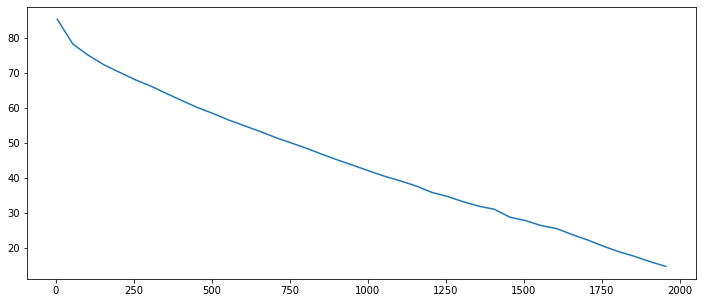

In [12]:
X = cv1.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
scores = []
for i in tqdm(range(5, 2000, 50)):
  cluster = KMeans(n_clusters=i)
  cluster.fit(X)
  scores.append(np.sqrt(cluster.inertia_))
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 2000, 50)), scores)


100%|██████████| 40/40 [10:51<00:00, 29.57s/it]


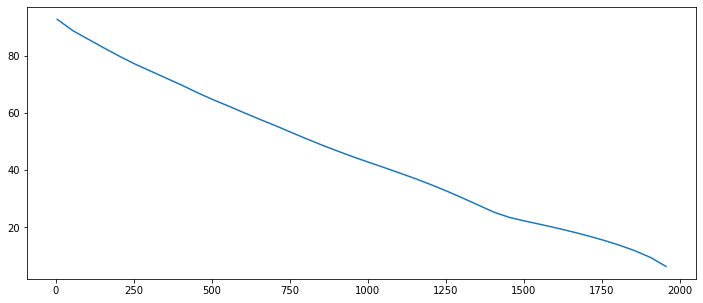

In [13]:
cv5 = CountVectorizer(ngram_range = (2,3))
X = cv5.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
scores = []
for i in tqdm(range(5, 2000, 50)):
  cluster = KMeans(n_clusters=i)
  cluster.fit(X)
  scores.append(np.sqrt(cluster.inertia_))
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 2000, 50)), scores)


100%|██████████| 40/40 [10:52<00:00, 29.29s/it]


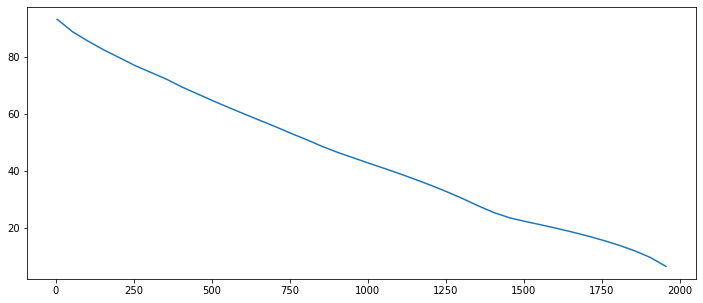

In [14]:
cv4 = CountVectorizer(ngram_range = (2,3))
X = cv5.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
scores = []
for i in tqdm(range(5, 2000, 50)):
  cluster = KMeans(n_clusters=i)
  cluster.fit(X)
  scores.append(np.sqrt(cluster.inertia_))
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 2000, 50)), scores)

Ни на словах, ни на n-граммах, ни на символьных n-граммах ничего похожего на локоть не получилось